Notebook demonstrating gradient descent for linear regression (d=1 features); adapted from https://scipython.com/blog/visualizing-the-gradient-descent-method/ .

In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
# generate some artificial data to be fitted
m = 20
w0_true = 2
w1_true = 0.5

X = numpy.linspace(-1,1,m)
y = w0_true + w1_true * X 

In [3]:
class LinearRegressionGradientDescent():
    """
    Linear regression implementation (gradient descent)
    """

    def __init__(self, eta=0.1, n_steps=5):
        
        self.eta = eta
        self.n_steps = n_steps
            
    def fit(self, X, y):
        """
        Fits the linear regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        y : Array of shape [n_samples, 1]
        """        

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))
        # IMPORTANT: Make sure that we have a column vector! 
        y = numpy.array(y).reshape((len(y), 1))
        
        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)

        self.w_history = []
        
        # starting point
        w = numpy.zeros((X.shape[1], 1))
        self.w_history.append(w.T[0])
        
        # gradient descent steps
        for i in range(self.n_steps):
            
            grad = 2.0/X.shape[0] * (numpy.dot(numpy.dot(X.T, X), w) - numpy.dot(X.T, y))
            w = w - self.eta * grad
            self.w_history.append(w.T[0])

        self._w = w
                
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of shape [n_samples, 1]
        """                     

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))

        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)           

        # compute predictions
        predictions = numpy.dot(X, self._w)

        return predictions

In [16]:
def hypothesis(x, w0, w1):
    """Our "hypothesis function", a straight line."""
    return w0 + w1*x

N = 5
eta = 0.5
model = LinearRegressionGradientDescent(eta=eta, n_steps=N)
model.fit(X,y)

w_history = model.w_history


Text(0.5, 1.0, 'L($w_0$, $w_1$)')

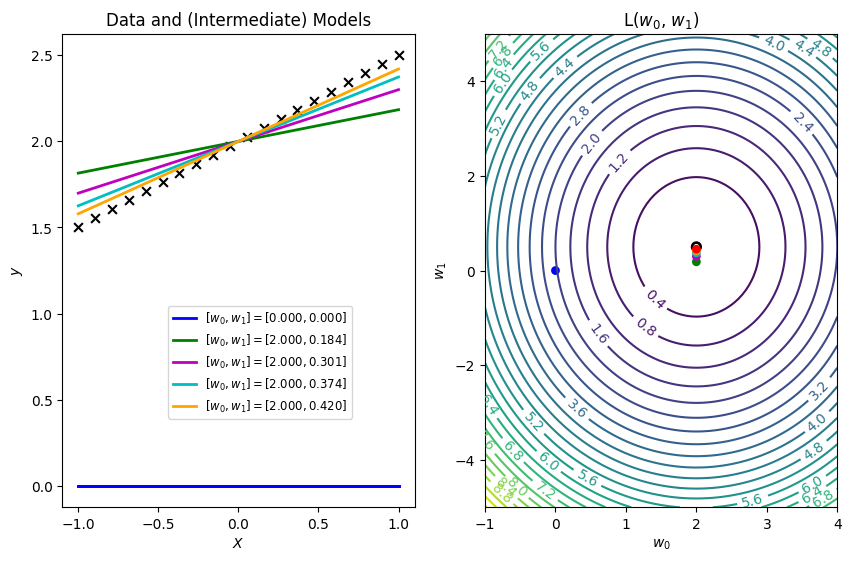

In [17]:
colors = ['b', 'g', 'm', 'c', 'orange', 'r', 'blue', 'purple', 'brown', 'pink', 'yellow']
colors = colors[:N+1]

def cost_func(w0, w1):
    """
    The cost function, L(w0, w1)
    """
    # see https://numpy.org/doc/stable/reference/generated/numpy.atleast_3d.html
    w0 = numpy.atleast_3d(numpy.asarray(w0))
    w1 = numpy.atleast_3d(numpy.asarray(w1))
    return numpy.average((y - hypothesis(X, w0, w1))**2, axis=2)/2

# left plot

# plot m data points
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(X, y, marker='x', s=40, color='k')

# plot the sequence of corresponding models
for j in range(0,N):
    ax[0].plot(X, hypothesis(X, *w_history[j]), color=colors[j], lw=2,
           label=r'$[w_0,w_1] = [{:.3f},{:.3f}]$'.format(*w_history[j]))

ax[0].set_xlabel(r'$X$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and (Intermediate) Models')
axbox = ax[0].get_position()
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height), fontsize='small')

ax[0].plot(X, hypothesis(X, *w_history[0]), color=colors[0], lw=2, 
           label=r'$[w_0, w_1] = [{:.3f}, {:.3f}]$'.format(*w_history[0]))

# right plot

# contour plot sketching the shape of the cost function
w0_grid = numpy.linspace(-1,4,101)
w1_grid = numpy.linspace(-5,5,101)
L_grid = cost_func(w0_grid[numpy.newaxis,:,numpy.newaxis], w1_grid[:,numpy.newaxis,numpy.newaxis])

Xgrid, Ygrid = numpy.meshgrid(w0_grid, w1_grid)
contours = ax[1].contour(Xgrid, Ygrid, L_grid, 30)
ax[1].clabel(contours) 

# the optimal vector [w0_true, w1_true]
ax[1].scatter([w0_true]*2,[w1_true]*2,s=[50,10], color=['k','w'])
ax[1].scatter(*zip(*w_history), c=colors, s=40, lw=0)
ax[1].set_xlabel(r'$w_0$')
ax[1].set_ylabel(r'$w_1$')
ax[1].set_title('L($w_0$, $w_1$)')
